# Sonar_Functional Model
## 케라스(Keras)는 파이썬으로 작성된 오픈 소스 신경망 라이브러리 입니다. 텐서플로우, MXNet, Deeplearning4j 등을 백엔드로 사용하여 인공지능 코딩을 할 수 있게 해줍니다. 딥 신경망을 빠르고 쉽게 코딩을 가능할 수 있게 해주고 최소한의 모듈 방식으로 확장 가능성에 초점을 둔 라이브러리 입니다. 사용하기 쉬운 고차원 딥러닝을 케라스 API를 통해 코딩을 할 수 있는데요, 유저 친화적인 API를 제공하여 쉽게 딥러닝 모델을 만들어 낼 수 있어서 인공지능 코딩에 현재 가장 많이 사용되고 있는 라이브러리 입니다.

[출처] https://ebbnflow.tistory.com/118?category=850456

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
#층을 담는 그릇(Sequential은 keras에 포함되어 있는데
# 딥러닝 모델을 한층 한층 쌓기 쉽게 해주는 함수)
from tensorflow.keras.layers import Dense
#층을 만드는 것(각 층이 가질 특성을 각각 다르게 지정 가능) 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# seed값 생성
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 로드
df = pd.read_csv('dataset/sonar.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

결측치는 존재하지 않지만 60열이 실수가 아니기 때문에 바꿔야함

In [5]:
# 전처리 
dataset = df.values
X = dataset[:, 0:60]
Y_obj = dataset[:, 60]

In [6]:
# 전처리 - 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)   # Y_obj을 fit
Y = e.transform(Y_obj)   # Y_obj에 따라 encoding
Y = np.asarray(Y).astype(np.float32)
X = np.asarray(X).astype(np.float32)

### 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
### input_dim : 입력 뉴런의 수를 설정합니다.
### init : 가중치 초기화 방법 설정합니다.
### ‘uniform’ : 균일 분포
### ‘normal’ : 가우시안 분포
### activation : 활성화 함수 설정합니다.
### ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
### ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
### ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
### ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.
Dense 레이어는 입력 뉴런 수에 상관없이 출력 뉴런 수를 자유롭게 설정할 수 있기 때문에 출력층으로 많이 사용됩니다. 이진 분류문제에서는 0과 1을 나타내는 출력 뉴런이 하나만 있으면 되기 때문에 아래 코드처럼 출력 뉴런이 1개이고, 입력 뉴런과 가중치를 계산한 값을 0에서 1사이로 표현할 수 있는 활성화 함수인 sigmoid을 사용합니다.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((145, 60), (63, 60), (145,), (63,))

In [8]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# 모델 컴파일
model.compile(loss='mean_squared_error',
     optimizer='adam',
     metrics=['accuracy']
)

In [13]:
# 모델 실행
history=model.fit(X_train, Y_train, epochs = 130, batch_size = 5,verbose=0)

In [21]:
# 결과 출력
print("\n Accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 996us/step - loss: 0.1560 - accuracy: 0.8095

 Accuracy : 0.8095


# 학습과정 시각화

In [32]:
type(history.history)

dict

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
# 훈련 데이터 정확도/손실값
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[:3]

[0.9931034445762634, 1.0, 1.0]

In [39]:
# 훈련 데이터 정확도/손실값
accuracy = history.history['accuracy']
val_loss = history.history['loss']
accuracy[:3]

[0.9931034445762634, 1.0, 1.0]

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

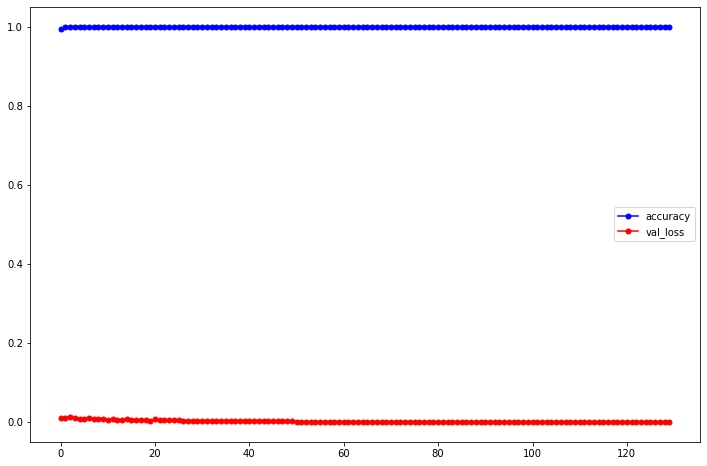

In [40]:
x_len = np.arange(len(accuracy))
plt.figure(figsize=(12,8))
plt.plot(x_len, accuracy, 'bo-', markersize=5, label='accuracy')
plt.plot(x_len, val_loss, 'ro-', markersize=5, label='val_loss')
plt.legend()
plt.show()